In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.timeseries import LombScargle as LS
from scipy.signal import find_peaks


In [2]:
###'/data/jpr64/NG0535-0523_802_2017,2017S_CYCLE1807.fits'

def load_file(filename):
    """Loads the NGTS data file in my files and returns the hdu object"""
    hdu = fits.open(filename)
    return hdu

def load_obj(obj_index):
    """Loads the time series and flux for a given obj_index (not id) then removes points with 0 flux. """
    obj_index = int(obj_index)
    time = hdu['hjd'].data[obj_index]
    time = time / (24*60*60)
    
    flux = hdu['sysrem_flux3'].data[obj_index]
    flux[flux == 0] = np.nan
    
    flux_mean = hdu['catalogue'].data['flux_mean']
    flux_mean = flux_mean[obj_index]
    return time, flux, flux_mean

In [21]:
# Load the flux and time
hdu = load_file('/data/jpr64/NG0535-0523_802_2017,2017S_CYCLE1807.fits')

idx = 4895
time, flux, flux_mean = load_obj(idx)
# flux /= f_mean

std = np.nanstd(flux)
print(std)

23.905819


0.06318976


<IPython.core.display.Javascript object>


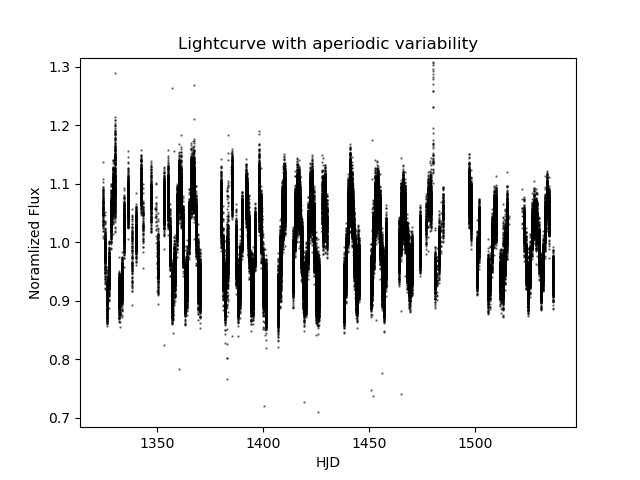

In [29]:
# Load the flux and time
hdu = load_file('/data/jpr64/NG0535-0523_802_2017,2017S_CYCLE1807.fits')

idx = 4895
time, flux, flux_mean = load_obj(idx)
flux /= flux_mean

std = np.nanstd(flux)
print(std)

%matplotlib notebook
plt.scatter(time, flux, alpha = 0.5, s=0.5, color='black')
plt.xlabel('HJD')
plt.ylabel('Noramlized Flux')
plt.ylim(1 - 5*std, 1 + 5*std)
plt.title("Lightcurve with aperiodic variability")
plt.show()




[  1   4   7  11  14  17  22  25  29  33  38  43  51  57  66  84  99 109
 144 185 235 306 413 655]


<IPython.core.display.Javascript object>


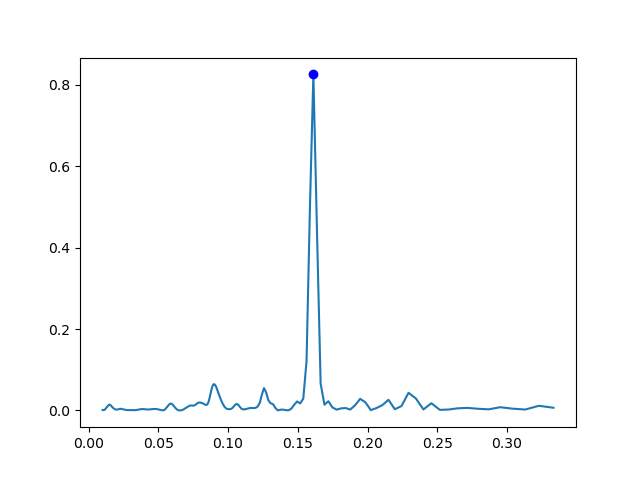

In [31]:
ok = np.where(flux > 0)
flux = flux[ok]
time = time[ok]
# flux = flux[np.where(time<1450)]
# time = time[np.where(time<1450)]

frequency = 1 / np.linspace(3, 100, 1000) 
power = LS(time, flux).power(frequency)

peaks, _ = find_peaks(power)
print(peaks)
max_idx = np.where(power == np.max(power[peaks]))
max_power_freq = frequency[max_idx]


plt.figure()
plt.plot(frequency, power)
plt.plot(frequency[max_idx], power[max_idx], 'bo')
plt.show()

<IPython.core.display.Javascript object>


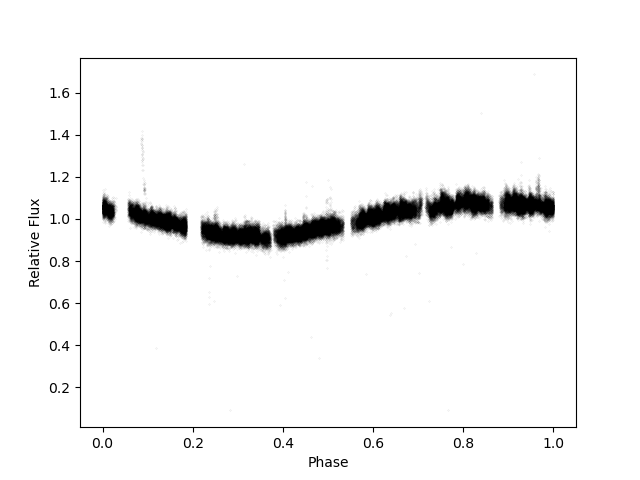

Text(0, 0.5, 'Relative Flux')

In [32]:
phase = ((time-time[0])*max_power_freq) %1
plt.figure()
plt.plot(phase, flux, 'k.', alpha=0.2, ms=0.4)
plt.ylim(0.8,1.2)
plt.xlabel('Phase')
plt.ylabel('Relative Flux')



<IPython.core.display.Javascript object>


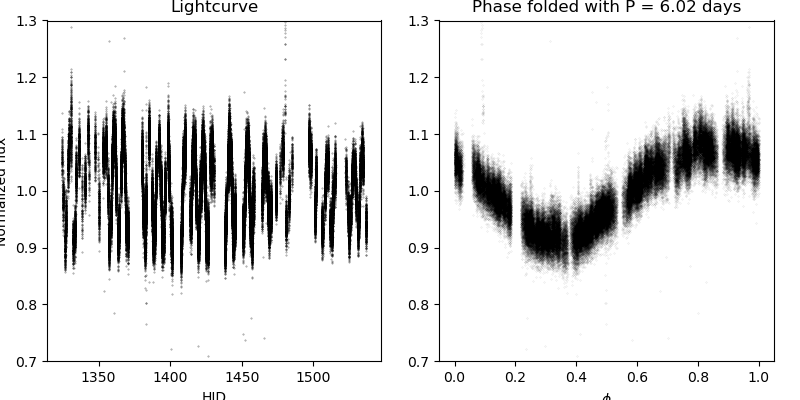

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))
plt.tight_layout()

ax[1].plot(phase, flux, 'k.', alpha=0.2, ms=0.4) #row=0, col=0
# ax[0].ylim(0.8, 1.2)
ax[1].set_ylim([0.7,1.3])
ax[0].set_ylabel(r'Normalized flux')
ax[1].set_xlabel(r'$\phi$')
ax[0].plot(time, flux, 'k.', alpha=0.5, ms=0.7) #row=0, col=1
ax[0].set_ylim([0.7,1.3])
ax[0].set_xlabel(r'HJD')
ax[0].set_title(r'Lightcurve')
ax[1].set_title(r'Phase folded with P = 6.02 days')
plt.show()

plt.savefig('plots/Periodic_LC.png')


In [24]:
1/max_power_freq

array([6.2042042])